# 学習

## 今回使用する手法
- RandomForest
- XGBoost
- LightGBM


In [ ]:
# 必要なライブラリのインポート
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
# データディレクトリの設定
DATA_DIR = Path("./data")

# テストに使用するデータの指定
TEST_TARGET = "tada-5"

In [3]:
# データの読み込み
df_data = pd.read_csv(DATA_DIR / "features.csv")
df_train = df_data[df_data["_data_name"] != TEST_TARGET]
df_test = df_data[df_data["_data_name"] == TEST_TARGET]

# "label"列と"_"で始まる列を削除
columns_to_drop = ["label"] + [col for col in df_data.columns if col.startswith("_")]

# 学習データ
x_train = df_train.drop(columns=columns_to_drop)
# 学習データの正解ラベル
y_train = df_train["label"]

# テストデータ
x_test = df_test.drop(columns=columns_to_drop)
# テストデータの正解ラベル
y_test = df_test["label"]

In [4]:
# x_train の確認
x_train

,x_acc_min,y_acc_min,z_acc_min,norm_acc_min,x_gyro_min,y_gyro_min,z_gyro_min,norm_gyro_min,x_acc_max,y_acc_max,...,z_gyro_median,norm_gyro_median,x_acc_zcr,y_acc_zcr,z_acc_zcr,norm_acc_zcr,x_gyro_zcr,y_gyro_zcr,z_gyro_zcr,norm_gyro_zcr
0,-5.644071,5.181657,-5.577670,5.556446,-1.544115,-3.277597,-1.444391,0.181149,5.416752,22.324436,...,0.131031,0.955226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5.644071,4.869394,-5.577670,5.064516,-1.681559,-3.277597,-1.444391,0.181149,5.782256,24.407389,...,0.203265,1.021665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5.644071,4.869394,-5.577670,5.064516,-1.681559,-4.118606,-1.444391,0.192931,5.782256,24.407389,...,0.184939,1.095539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5.644071,2.538785,-5.577670,3.182751,-1.681559,-4.118606,-1.444391,0.192931,6.437889,28.908289,...,0.229685,1.039152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5.644071,2.538785,-5.577670,3.182751,-1.681559,-4.118606,-1.444391,0.192931,6.437889,28.908289,...,0.226020,1.068102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.660619,9.539586,-0.327817,9.695041,-0.034056,-0.040012,-0.012675,0.000374,1.818545,9.664611,...,0.000000,0.012860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1265,1.665405,9.544372,-0.327817,9.695041,-0.034056,-0.040012,-0.012675,0.000374,1.818545,9.664611,...,-0.000153,0.011922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1266,1.665405,9.539586,-0.327817,9.695041,-0.034056,-0.040012,-0.012675,0.000374,1.818545,9.664611,...,-0.000153,0.012655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1267,1.664208,9.539586,-0.327817,9.689717,-0.034056,-0.040012,-0.012675,0.000374,1.819742,9.701101,...,-0.000153,0.012665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# y_train の確認
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1264    3
1265    3
1266    3
1267    3
1268    3
Name: label, Length: 957, dtype: int64

In [6]:
x_test

,x_acc_min,y_acc_min,z_acc_min,norm_acc_min,x_gyro_min,y_gyro_min,z_gyro_min,norm_gyro_min,x_acc_max,y_acc_max,...,z_gyro_median,norm_gyro_median,x_acc_zcr,y_acc_zcr,z_acc_zcr,norm_acc_zcr,x_gyro_zcr,y_gyro_zcr,z_gyro_zcr,norm_gyro_zcr
390,-2.736193,5.444868,-7.656434,5.947935,-2.350151,-3.967264,-0.71685,0.118620,9.489935,20.391037,...,-0.006261,0.965207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,-2.736193,5.444868,-7.656434,5.947935,-2.350151,-3.967264,-0.71685,0.101060,9.489935,20.391037,...,0.010843,1.003868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,-2.736193,5.444868,-7.656434,5.947935,-2.350151,-4.084398,-0.71685,0.092478,9.489935,20.391037,...,0.015577,1.044044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,-2.736193,4.725825,-7.296913,5.947935,-2.202627,-4.084398,-0.71685,0.092478,9.489935,20.391037,...,0.041081,1.058051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,-2.736193,4.725825,-7.296913,5.947935,-2.202627,-4.094935,-0.71685,0.092478,9.489935,20.391037,...,0.061545,1.097993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,-7.669595,6.777072,-6.516852,7.181758,-1.348943,-2.375350,-0.59651,0.011372,5.204988,14.885152,...,0.083994,1.205542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,-2.656033,6.895517,-6.516852,7.181758,-1.348943,-2.375350,-0.74098,0.011372,5.204988,14.885152,...,0.027489,1.200223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,-2.656033,3.781856,-6.516852,3.937917,-2.060296,-2.915354,-0.74098,0.011372,10.003195,22.500908,...,0.019090,1.133036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,-2.656033,3.781856,-6.516852,3.937917,-2.060296,-3.828598,-0.74098,0.011372,10.003195,22.500908,...,0.060323,1.218107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y_test

390    1
391    1
392    1
393    1
394    1
      ..
697    1
698    1
699    1
700    1
701    1
Name: label, Length: 312, dtype: int64

In [8]:
# モデルの定義
clf = RandomForestClassifier()

# 学習
clf.fit(x_train, y_train)

# モデルの保存
with open(DATA_DIR / "model.pkl", "wb") as f:
    pickle.dump(clf, f)

In [ ]:
# テスト
y_pred = clf.predict(x_test)

Accuracy: 0.9006


In [ ]:
# 精度の計算
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

In [18]:
# ラベル一覧(再掲)
df_labels = pd.read_csv(DATA_DIR / "labels.csv", names=["label", "description"])
print(df_labels)

    label description
0  others         その他
1    walk          歩く
2     sit          座る
3    stop       立ち止まる


# 混同行列
正解と予測結果を比較し，どれがどれに間違えられやすいかを確認するための表
縦軸が正解，横軸が予測結果となっており，斜めの要素の値が高いほど正解率が高い

以下の場合，`歩く (1)` が `歩く (1)` と推定された割合が 88% であり，`その他 (1)` の 26% は `歩く (1)` と誤分類されているなどが分かる

<image width="400px" src="./images/2-conf-mat.png" />

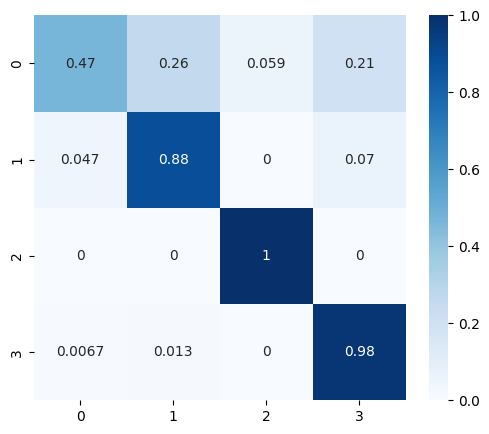

In [15]:
# 混同行列の表示
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')

# 混同行列のヒートマップを作成
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, cmap = 'Blues', annot=True)
plt.show()

In [31]:
list(df_labels.index)

[0, 1, 2, 3]

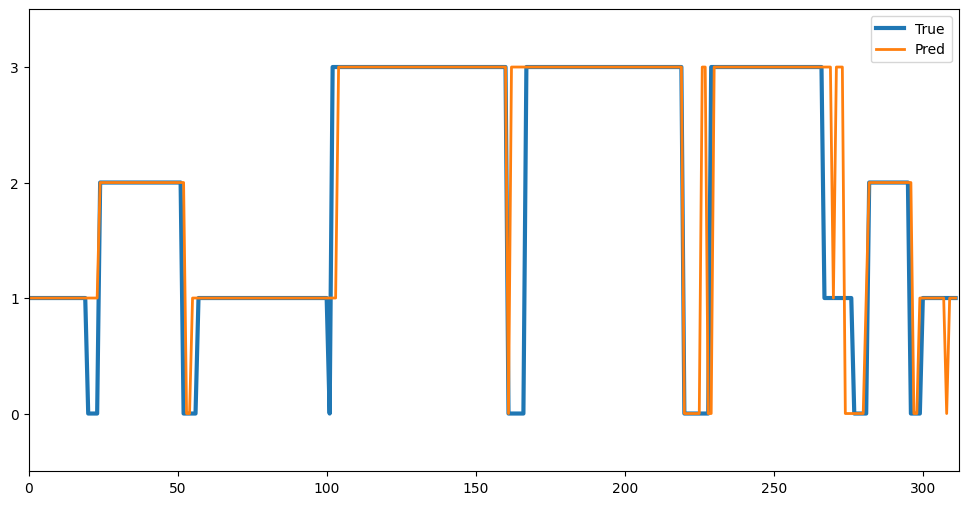

In [ ]:
# 時系列での比較 (グラフ)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="True", zorder=1, linewidth=3)
plt.plot(y_pred, label="Pred", zorder=2, linewidth=2)
plt.legend()
plt.yticks(list(df_labels.index))
plt.ylim(-0.5, len(df_labels) - 0.5)
plt.xlim(0, len(y_test))
plt.show()